In [1]:
import os
import pickle as pkl
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from functions import *

In [2]:
proAB = pd.read_csv('../data/Proteomics/Proteomics_AB.csv')
proA = pd.read_excel('../data/Proteomics/Proteomics_A.xlsx')

In [3]:
name_dict = {proA['Accession'][i]: proA['Gene Name'][i] for i in proA.index}

In [3]:
proA , proB = proAB[['ID'] + list(proAB.columns[1:13])], proAB[['ID'] + list(proAB.columns[-12:])]
proA = proA.set_index('ID');  proB = proB.set_index('ID'); 
proA = proA.T; proB = proB.T
genes_keep_A =  proA.columns[proA.sum(axis=0) > 0];
genes_keep_B =  proB.columns[proB.sum(axis=0) > 0];
print( len(genes_keep_A) )
print( len(genes_keep_B) )
proA = proA[ genes_keep_A ]; proB = proB[ genes_keep_B ];

1930
2010


In [4]:
proA.head()

ID,Q88XZ2,F9UQ80,Q88XZ3,Q88YM5,F9UPM3,Q88XY8,F9UMJ6,Q88VM0,Q88YL7,Q88UX7,...,F9UNN3,F9US53,F9ULS4,F9UP52,F9UT21,Q6LWE9,F9USF0,F9USE9,F9UMY0,F9UQH0
pH6.5-A1,0.953941,1.098157,0.984365,1.180566,0.979388,0.843732,0.892953,1.038277,0.975109,0.869205,...,1.217071,0.429022,0.645667,1.356487,1.755606,2.448913,1.325425,1.549058,1.194633,1.139113
pH6.5-A2,0.948686,1.092051,0.958025,1.099416,0.922192,0.792791,0.898967,1.016869,0.994594,0.872009,...,0.940686,0.529735,0.618698,1.073147,1.599914,1.859084,1.298768,1.433712,1.200504,1.244342
pH6.5-A3,0.959824,1.088798,0.973352,1.114709,0.962767,0.847329,0.903096,1.064557,0.994934,0.899866,...,0.921728,0.449954,0.637247,0.644167,1.438833,2.149128,1.274419,1.223992,1.030700,1.128614
pH5.5-A1,0.900860,1.053578,0.956216,1.007134,0.910077,0.869612,0.784422,0.878350,0.955569,0.809208,...,0.986910,0.570687,0.772602,2.376679,1.602639,1.072465,1.080447,1.727985,1.086672,0.564588
pH5.5-A2,0.927636,1.065448,0.988657,0.967139,0.911675,0.861731,0.797200,0.932192,0.997248,0.823929,...,0.861266,0.525929,0.628768,1.848531,1.652832,1.099677,1.314588,1.570736,1.248000,0.672149


In [5]:
# convert m/z ratios to non-negative integers by mutiplying 1000
for k in proA.columns:
    temp = [ int(x*1000) for x in list(proA[k]) ]
    proA[k] = temp

for k in proB.columns:
    temp = [ int(x*1000) for x in list(proB[k]) ]
    proB[k] = temp

In [6]:
proA.head()

ID,Q88XZ2,F9UQ80,Q88XZ3,Q88YM5,F9UPM3,Q88XY8,F9UMJ6,Q88VM0,Q88YL7,Q88UX7,...,F9UNN3,F9US53,F9ULS4,F9UP52,F9UT21,Q6LWE9,F9USF0,F9USE9,F9UMY0,F9UQH0
pH6.5-A1,953,1098,984,1180,979,843,892,1038,975,869,...,1217,429,645,1356,1755,2448,1325,1549,1194,1139
pH6.5-A2,948,1092,958,1099,922,792,898,1016,994,872,...,940,529,618,1073,1599,1859,1298,1433,1200,1244
pH6.5-A3,959,1088,973,1114,962,847,903,1064,994,899,...,921,449,637,644,1438,2149,1274,1223,1030,1128
pH5.5-A1,900,1053,956,1007,910,869,784,878,955,809,...,986,570,772,2376,1602,1072,1080,1727,1086,564
pH5.5-A2,927,1065,988,967,911,861,797,932,997,823,...,861,525,628,1848,1652,1099,1314,1570,1248,672


In [7]:
meta_A = pd.DataFrame(zip(list(proA.index), [x.split('-')[0] for x in list(proA.index) ] ), columns=['sample','condition'])
meta_A = meta_A.set_index('sample')

meta_B = pd.DataFrame(zip(list(proB.index), [x.split('-')[0] for x in list(proB.index) ] ), columns=['sample','condition'])
meta_B = meta_B.set_index('sample')

# Single factor analysis (ref_condition = pH6.5)

In [ ]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [28]:
OUTPUT_PATH = "../data/Proteomics/"
inference = DefaultInference()

In [17]:
dds_A = DeseqDataSet( counts= proA, metadata= meta_A,
    design_factors="condition", refit_cooks=True, ref_level= ["condition", "pH6.5"], inference=inference )
dds_B = DeseqDataSet( counts= proB, metadata= meta_B,
    design_factors="condition", refit_cooks=True,ref_level= ["condition", "pH6.5"], inference=inference )

In [18]:
dds_A.deseq2()
print(dds_A)

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.35 seconds.

Fitting dispersion trend curve...
... done in 0.06 seconds.

Fitting MAP dispersions...
... done in 0.40 seconds.

Fitting LFCs...


AnnData object with n_obs × n_vars = 12 × 1930
    obs: 'condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'


... done in 0.21 seconds.

Refitting 0 outliers.



In [19]:
dds_B.deseq2()
print(dds_B)

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.36 seconds.

Fitting dispersion trend curve...
... done in 0.12 seconds.

Fitting MAP dispersions...
... done in 0.55 seconds.

Fitting LFCs...


AnnData object with n_obs × n_vars = 12 × 2010
    obs: 'condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'


... done in 0.31 seconds.

Refitting 5 outliers.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



In [27]:
dds_B.varm['LFC']

,intercept,condition_pH5_vs_pH6.5,condition_pH5.5_vs_pH6.5,condition_pH4.5_vs_pH6.5
ID,,,,
Q88XZ2,7.003119,-0.023363,-0.013380,-0.017860
F9UQ80,7.020615,-0.120557,-0.054412,-0.149834
Q88XZ3,6.932237,0.064611,0.032378,0.014154
Q88YM5,7.204620,-0.332889,-0.403404,-0.214839
F9UPM3,7.132744,-0.190518,-0.057161,-0.290413
...,...,...,...,...
F9US85,-2.496266,10.687076,-3.383746,10.654027
F9USP2,-3.348843,10.569626,-4.310509,11.593265
F9UP32,-2.478589,10.666407,-3.353798,10.629366


# Statistical analysis 

In [29]:
resA_5vs6d5 = DeseqStats(dds_A,contrast= ['condition', 'pH5', 'pH6.5'],inference=inference)
resA_5d5vs6d5 = DeseqStats(dds_A,contrast= ['condition', 'pH5.5', 'pH6.5'], inference=inference)
resA_4d5vs6d5 = DeseqStats(dds_A,contrast= ['condition', 'pH4.5', 'pH6.5'], inference=inference)

resB_5vs6d5 = DeseqStats(dds_B,contrast= ['condition', 'pH5', 'pH6.5'], inference=inference)
resB_5d5vs6d5 = DeseqStats(dds_B,contrast= ['condition', 'pH5.5', 'pH6.5'], inference=inference)
resB_4d5vs6d5 = DeseqStats(dds_B, contrast= ['condition', 'pH4.5', 'pH6.5'],inference=inference)

In [30]:
resA_5vs6d5.summary()
resA_5d5vs6d5.summary()
resA_4d5vs6d5.summary()

Running Wald tests...
... done in 1.28 seconds.

Running Wald tests...
... done in 0.11 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: condition pH5 vs pH6.5
           baseMean  log2FoldChange     lfcSE       stat        pvalue  \
ID                                                                       
Q88XZ2   939.867513        0.011876  0.050437   0.235464  8.138490e-01   
F9UQ80  1003.163844       -0.201946  0.049284  -4.097576  4.174988e-05   
Q88XZ3   973.981500        0.019772  0.049859   0.396562  6.916904e-01   
Q88YM5   977.049344       -0.308235  0.059221  -5.204793  1.942126e-07   
F9UPM3   934.107975       -0.029463  0.052217  -0.564253  5.725821e-01   
...             ...             ...       ...        ...           ...   
Q6LWE9  1082.579216       -1.673844  0.152122 -11.003295  3.684179e-28   
F9USF0  1134.990335       -0.311278  0.095543  -3.257976  1.122099e-03   
F9USE9  1592.808076        0.361341  0.121808   2.966465  3.012444e-03   
F9UMY0  1302.047877        0.471424  0.094275   5.000523  5.717503e-07   
F9UQH0  1011.203900       -0.505955  0.353681  -1.4

... done in 0.12 seconds.



In [31]:
resB_5vs6d5.summary()
resB_5d5vs6d5.summary()
resB_4d5vs6d5.summary()

Running Wald tests...
... done in 0.12 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: condition pH5 vs pH6.5
           baseMean  log2FoldChange      lfcSE      stat    pvalue      padj
ID                                                                          
Q88XZ2  1085.184030       -0.033705   0.046111 -0.730964  0.464801  0.534508
F9UQ80  1033.913905       -0.173927   0.061537 -2.826386  0.004708  0.012610
Q88XZ3  1053.981693        0.093215   0.069150  1.348009  0.177655  0.236354
Q88YM5  1073.662516       -0.480257   0.123909 -3.875898  0.000106  0.000619
F9UPM3  1101.697680       -0.274860   0.088464 -3.107004  0.001890  0.006626
...             ...             ...        ...       ...       ...       ...
F9US85  1811.792674       15.418192   5.011422  3.076610  0.002094  0.007002
F9USP2  1754.512273       15.248747   6.041780  2.523883  0.011607  0.025345
F9UP32  1812.026229       15.388372   4.996604  3.079766  0.002072  0.007002
F9UTG7  1905.676670       21.725733  25.301576  0.858671  0.390522  0.461234
F9UQ73  1809.90

... done in 0.11 seconds.

Running Wald tests...
... done in 0.12 seconds.



In [33]:
# "../data/Proteomics/"
# resA_5vs6d5.results_df.to_csv("../data/Proteomics/deg_5vs6d5_A.csv")
# resA_5d5vs6d5.results_df.to_csv("../data/Proteomics/deg_5d5vs6d5_A.csv")
# resA_4d5vs6d5.results_df.to_csv("../data/Proteomics/deg_4d5vs6d5_A.csv")

# resB_5vs6d5.results_df.to_csv("../data/Proteomics/deg_5vs6d5_B.csv")
# resB_5d5vs6d5.results_df.to_csv("../data/Proteomics/deg_5d5vs6d5_B.csv")
# resB_4d5vs6d5.results_df.to_csv("../data/Proteomics/deg_4d5vs6d5_B.csv")

# Volcano plots

In [4]:
deg_5d5vs6d5_A = pd.read_csv("../data/Proteomics/deg_5d5vs6d5_A.csv")
deg_5vs6d5_A = pd.read_csv("../data/Proteomics/deg_5vs6d5_A.csv")
deg_4d5vs6d5_A = pd.read_csv("../data/Proteomics/deg_4d5vs6d5_A.csv")

Text(0.5, 1.0, 'pH4.5 vs pH6.5 (Batch A)')

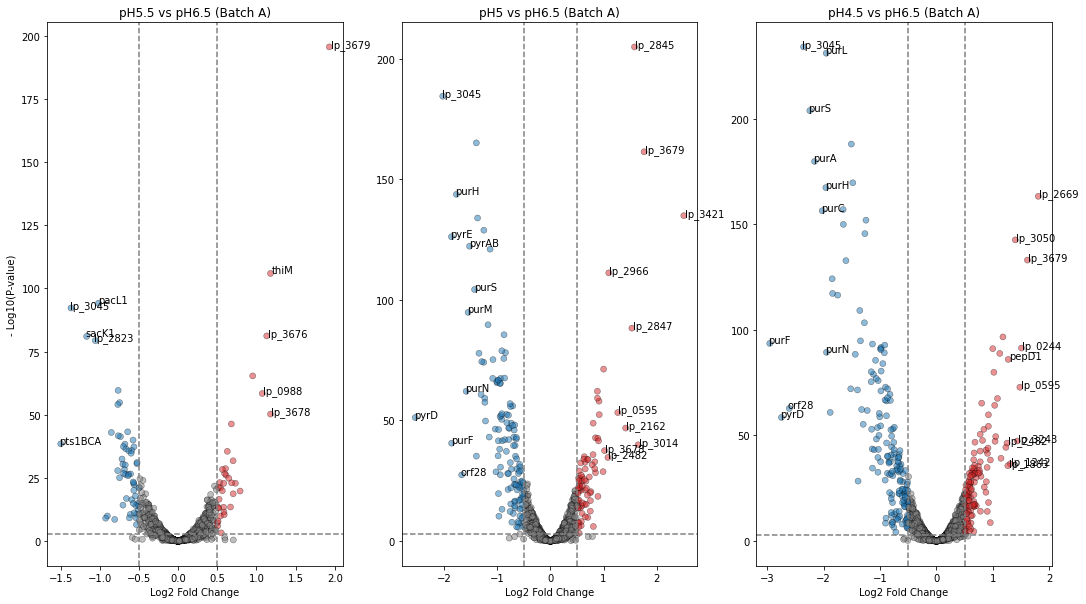

In [5]:
fig, axs = plt.subplots(1,3,figsize=(18,10))
volcano( deg_5d5vs6d5_A, 'log2FoldChange', 'pvalue', 0.5, 0.001, axs[0])
annot_topn( deg_5d5vs6d5_A, 10,name_dict, 'log2FoldChange', 'pvalue', 1.0, 0.001, 10, axs[0] )
volcano( deg_5vs6d5_A, 'log2FoldChange', 'pvalue', 0.5, 0.001, axs[1])
annot_topn( deg_5vs6d5_A,10, name_dict, 'log2FoldChange', 'pvalue', 1.0, 0.001, 10, axs[1] )
volcano( deg_4d5vs6d5_A, 'log2FoldChange', 'pvalue', 0.5, 0.001, axs[2])
annot_topn( deg_4d5vs6d5_A, 10,name_dict, 'log2FoldChange', 'pvalue', 1.0, 0.001, 10, axs[2] )
for ax in axs:
    ax.set_xlabel('Log2 Fold Change')
axs[0].set_ylabel('- Log10(P-value)')
axs[0].set_title('pH5.5 vs pH6.5 (Batch A)')
axs[1].set_title('pH5 vs pH6.5 (Batch A)')
axs[2].set_title('pH4.5 vs pH6.5 (Batch A)')

In [6]:
deg_5d5vs6d5_B = pd.read_csv("../data/Proteomics/deg_5d5vs6d5_B.csv")
deg_5vs6d5_B = pd.read_csv("../data/Proteomics/deg_5vs6d5_B.csv")
deg_4d5vs6d5_B = pd.read_csv("../data/Proteomics/deg_4d5vs6d5_B.csv")

Text(0.5, 1.0, 'pH4.5 vs pH6.5 (Batch B)')

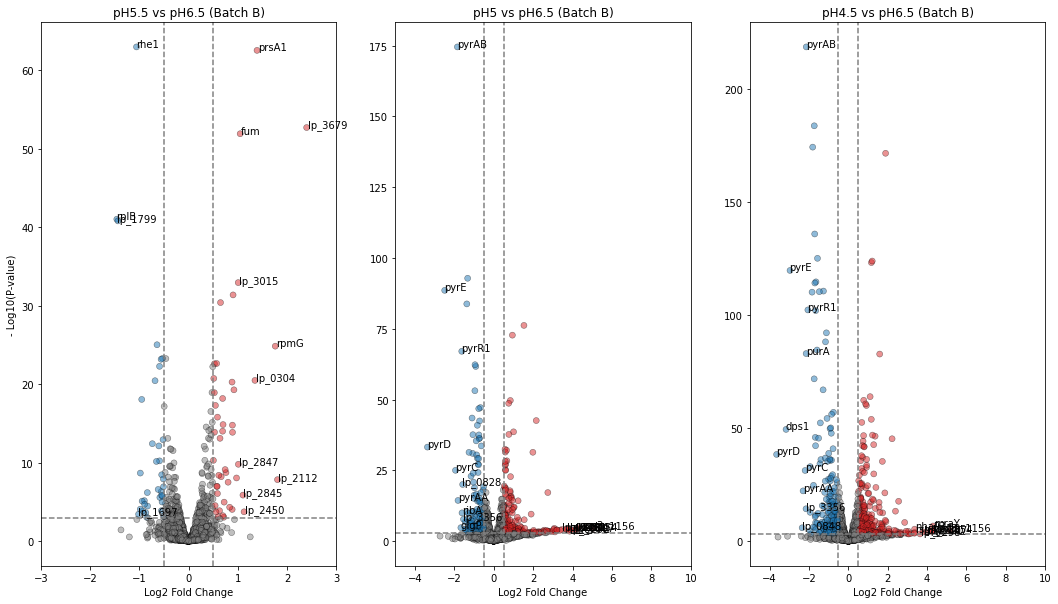

In [8]:
fig, axs = plt.subplots(1,3,figsize=(18,10))
volcano( deg_5d5vs6d5_B, 'log2FoldChange', 'pvalue', 0.5, 0.001, axs[0])
annot_topn( deg_5d5vs6d5_B, 10, name_dict, 'log2FoldChange', 'pvalue', 1.0, 0.001, 10, axs[0] )
axs[0].set_xlim([-3,3])
volcano( deg_5vs6d5_B, 'log2FoldChange', 'pvalue', 0.5, 0.001, axs[1])
annot_topn( deg_5vs6d5_B, 10, name_dict, 'log2FoldChange', 'pvalue', 1.0, 0.001, 10, axs[1] )
axs[1].set_xlim([-5,10])
volcano( deg_4d5vs6d5_B, 'log2FoldChange', 'pvalue', 0.5, 0.001, axs[2])
annot_topn( deg_4d5vs6d5_B, 10, name_dict, 'log2FoldChange', 'pvalue', 1.0, 0.001, 10, axs[2] )
axs[2].set_xlim([-5,10])
for ax in axs:
    ax.set_xlabel('Log2 Fold Change')
axs[0].set_ylabel('- Log10(P-value)')
axs[0].set_title('pH5.5 vs pH6.5 (Batch B)')
axs[1].set_title('pH5 vs pH6.5 (Batch B)')
axs[2].set_title('pH4.5 vs pH6.5 (Batch B)')

# Pathway enrichment analysis

In [53]:
from matplotlib_venn import venn2, venn3

In [48]:
# def get_deg(table, lfc_col, pv_col, lfc_cutoff, pv_cutoff):
#     x_cut1 = lfc_cutoff; x_cut2 = - lfc_cutoff;
#     y_cut = -np.log10( pv_cutoff )
#     sig_table = table[ ( (table[lfc_col]>x_cut1) | (table[lfc_col]<x_cut2) ) & (table[pv_col]<pv_cutoff)  ]
#     sig_table = sig_table.reset_index().drop(['index'],axis=1)
#     return {'up':list(sig_table[sig_table[lfc_col]>0]['ID']),'down':list(sig_table[sig_table[lfc_col]<0]['ID'])}

Text(0.5, 0.98, 'Differential gene expression(Batch A)')

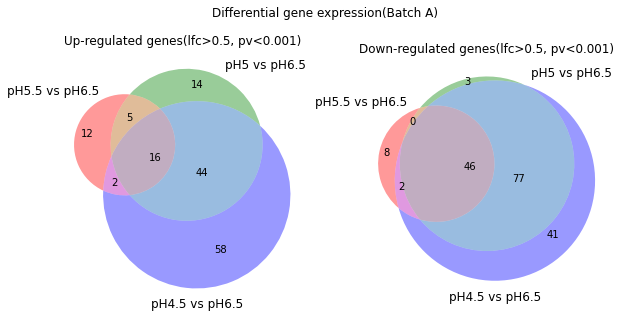

In [59]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
up_dict, down_dict = {},{}
labels = ['pH5.5 vs pH6.5','pH5 vs pH6.5','pH4.5 vs pH6.5']
genes_5d5vs6d5_A = get_deg( deg_5d5vs6d5_A, 'log2FoldChange', 'pvalue', 0.5, 0.001 )
genes_5vs6d5_A = get_deg( deg_5vs6d5_A, 'log2FoldChange', 'pvalue', 0.5, 0.001 )
genes_4d5vs6d5_A = get_deg( deg_4d5vs6d5_A, 'log2FoldChange', 'pvalue', 0.5, 0.001 )
up_dict['pH5.5 vs pH6.5'] = genes_5d5vs6d5_A['up']
up_dict['pH5 vs pH6.5'] = genes_5vs6d5_A['up']
up_dict['pH4.5 vs pH6.5'] = genes_4d5vs6d5_A['up']
down_dict['pH5.5 vs pH6.5'] = genes_5d5vs6d5_A['down']
down_dict['pH5 vs pH6.5'] = genes_5vs6d5_A['down']
down_dict['pH4.5 vs pH6.5'] = genes_4d5vs6d5_A['down']
venn3([set(up_dict['pH5.5 vs pH6.5']),set(up_dict['pH5 vs pH6.5']),set(up_dict['pH4.5 vs pH6.5'])],\
      set_labels=labels ,ax = axs[0])
venn3([set(down_dict['pH5.5 vs pH6.5']),set(down_dict['pH5 vs pH6.5']),set(down_dict['pH4.5 vs pH6.5'])],\
      set_labels=labels ,ax = axs[1])
axs[0].set_title('Up-regulated genes(lfc>0.5, pv<0.001)');
axs[1].set_title('Down-regulated genes(lfc>0.5, pv<0.001)');
plt.suptitle('Differential gene expression(Batch A)');

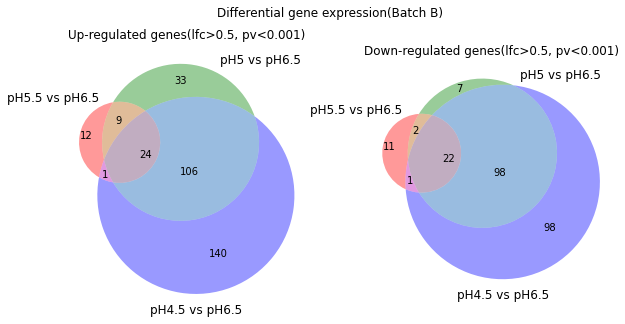

In [60]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
up_dict, down_dict = {},{}
labels = ['pH5.5 vs pH6.5','pH5 vs pH6.5','pH4.5 vs pH6.5']
genes_5d5vs6d5_B = get_deg( deg_5d5vs6d5_B, 'log2FoldChange', 'pvalue', 0.5, 0.001 )
genes_5vs6d5_B = get_deg( deg_5vs6d5_B, 'log2FoldChange', 'pvalue', 0.5, 0.001 )
genes_4d5vs6d5_B = get_deg( deg_4d5vs6d5_B, 'log2FoldChange', 'pvalue', 0.5, 0.001 )
up_dict['pH5.5 vs pH6.5'] = genes_5d5vs6d5_B['up']
up_dict['pH5 vs pH6.5'] = genes_5vs6d5_B['up']
up_dict['pH4.5 vs pH6.5'] = genes_4d5vs6d5_B['up']
down_dict['pH5.5 vs pH6.5'] = genes_5d5vs6d5_B['down']
down_dict['pH5 vs pH6.5'] = genes_5vs6d5_B['down']
down_dict['pH4.5 vs pH6.5'] = genes_4d5vs6d5_B['down']
venn3([set(up_dict['pH5.5 vs pH6.5']),set(up_dict['pH5 vs pH6.5']),set(up_dict['pH4.5 vs pH6.5'])],\
      set_labels=labels ,ax = axs[0])
venn3([set(down_dict['pH5.5 vs pH6.5']),set(down_dict['pH5 vs pH6.5']),set(down_dict['pH4.5 vs pH6.5'])],\
      set_labels=labels ,ax = axs[1])
axs[0].set_title('Up-regulated genes(lfc>0.5, pv<0.001)');
axs[1].set_title('Down-regulated genes(lfc>0.5, pv<0.001)');
plt.suptitle('Differential gene expression(Batch B)');